In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from config import technologies

df = pd.read_csv("../vacancies.csv")
df.head()

,title,skills,salary,company,description,link
0,Senior Python developer,"Python,Комунікабельність,MongoDB,Django,REST A...",NaN,G Rocks,"Про нас: G.Rocks — інноваційна компанія, яка р...",https://www.work.ua/en/jobs/5750923/
1,Python Developer,"Java,PHP,MySQL,Git,GitHub,GitLab,JavaScript,Py...",NaN,PNN Soft,Requirements: Bachelor’s or Master’s degree i...,https://www.work.ua/en/jobs/5536195/
2,Python developer (Middle/Senior),"Користувач ОС Linux,Git,Python,PostgreSQL,Djan...",NaN,Project Ukraine,Pythagoras Technology є частиною екосистеми бр...,https://www.work.ua/en/jobs/5722903/
3,Full-stack програміст на Python (Strong Junior),"JavaScript,SQL,Python,Комунікабельність,Відпов...",29000 UAH,Аптека АНЦ,"Привіт! Лідер аптечного ринку, мережа «Аптека ...",https://www.work.ua/en/jobs/5055123/
4,"Data Engineer (SQL, Python, Pandas)","SQL,Python,pandas",NaN,World Food Programme,Всесвітня продовольча програма (ВПП ООН) — це ...,https://www.work.ua/en/jobs/5560000/


In [9]:
def count_technologies(descriptions, technologies):
    tech_counter = Counter()
    for desc in descriptions:
        for tech in technologies:
            if re.search(r"\b" + re.escape(tech) + r"\b", desc, re.IGNORECASE):
                tech_counter[tech] += 1
    return tech_counter

tech_counts = count_technologies(df["description"], technologies)

tech_df = pd.DataFrame.from_dict(tech_counts, orient="index", columns=["count"])

tech_df = tech_df.sort_values(by="count", ascending=False)

<Figure size 1200x800 with 0 Axes>

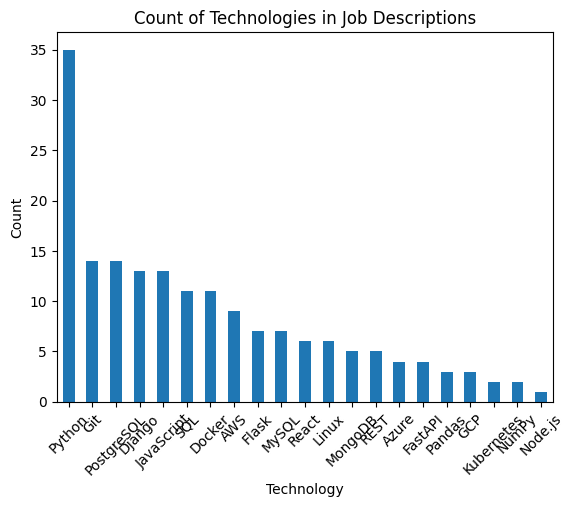

In [10]:
plt.figure(figsize=(12, 8))
tech_df.plot(kind='bar', legend=False)
plt.title("Count of Technologies in Job Descriptions")
plt.xlabel("Technology")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()